In [590]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go
%matplotlib inline

In [591]:
df=pd.read_csv("Bachelorette.csv")

In [592]:
df.head()

,Season,Name,Age,Hometown,State,College,Occupation,Win_Loss,Height (cm),Girlfriend While on the Show?,Hair Color,Eye Color
0,15.0,Jed Wyatt,25.0,"Sevierville, Tennessee",TN,Belmont University,Singer/Sonwriter,1.0,190.50,Yes,Brown,Brown
1,15.0,Tyler Cameron,26.0,"Jupiter, Florida",FL,Wake Forest,General Contractor,0.0,187.96,No,Brown,Green
2,15.0,Peter Weber,27.0,"Westlake Village, California",CA,Baylor University,Pilot,0.0,175.25,No,Brown,Brown
3,15.0,Luke Parker,24.0,"Gainesville, Georgia",GA,Faulkner University,Import/Export Manager,0.0,175.00,No,Blonde,Brown
4,15.0,Garrett Powell,27.0,"Homewood, Alabama",AL,Mississippi State University,Golf Pro,0.0,NaN,No,Brown,Green


In [546]:
df.isnull().sum()

Season                           13
Name                             13
Age                              13
Hometown                         13
State                            13
College                          14
Occupation                       13
Win_Loss                         13
Height (cm)                      53
Girlfriend While on the Show?    13
Hair Color                       13
Eye Color                        13
dtype: int64

In [548]:
df.info

<bound method DataFrame.info of      Season            Name   Age                      Hometown State  \
0      15.0       Jed Wyatt  25.0        Sevierville, Tennessee    TN   
1      15.0   Tyler Cameron  26.0              Jupiter, Florida    FL   
2      15.0     Peter Weber  27.0  Westlake Village, California    CA   
3      15.0     Luke Parker  24.0          Gainesville, Georgia    GA   
4      15.0  Garrett Powell  27.0             Homewood, Alabama    AL   
..      ...             ...   ...                           ...   ...   
149     NaN             NaN   NaN                           NaN   NaN   
150     NaN             NaN   NaN                           NaN   NaN   
151     NaN             NaN   NaN                           NaN   NaN   
152     NaN             NaN   NaN                           NaN   NaN   
153     NaN             NaN   NaN                           NaN   NaN   

                          College             Occupation  Win_Loss  \
0              Belmon

# Exploratory Data Analysis

<AxesSubplot:xlabel='Win_Loss', ylabel='count'>

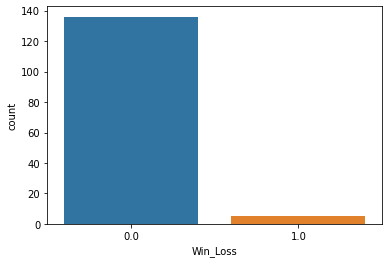

In [549]:
sns.countplot(x='Win_Loss',data=df)

In [550]:
df['Win_Loss'].value_counts()

0.0    136
1.0      5
Name: Win_Loss, dtype: int64

In [551]:
df['Season'].value_counts()

13.0    31
15.0    30
14.0    28
11.0    26
12.0    26
Name: Season, dtype: int64

## 5 people won. One from each season.

In [552]:
df[df['Win_Loss']==1]

,Season,Name,Age,Hometown,State,College,Occupation,Win_Loss,Height (cm),Girlfriend While on the Show?,Hair Color,Eye Color
0,15.0,Jed Wyatt,25.0,"Sevierville, Tennessee",TN,Belmont University,Singer/Sonwriter,1.0,190.50,Yes,Brown,Brown
32,14.0,Jason Tartick,29.0,"Buffalo, New York",NY,University of Rochester,Senior Corporate Banker,1.0,175.26,No,Brown,Brown
58,13.0,Bryan Abasolo,37.0,"Miami, Florida",FL,University of Florida,Chiropractor,1.0,187.96,No,Brown,Brown
89,12.0,Jordan Rodgers,27.0,"Chico, California",CA,Butte College,Former Pro Quarterback,1.0,187.96,No,Brown,Brown
115,11.0,Shawn Booth,28.0,"Windsor Locks, Connecticut",CT,Keene State College,Personal Trainer,1.0,187.96,No,Brown,Brown


## These are the people who won

<AxesSubplot:xlabel='Age', ylabel='count'>

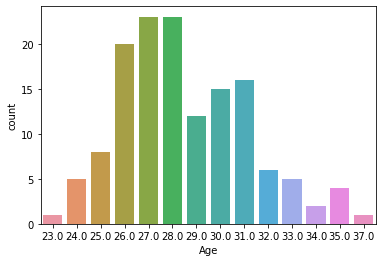

In [553]:
sns.countplot(x='Age',data=df)

## People in their Late 20s- Early 30s preferred to be a part of the show

<AxesSubplot:xlabel='Win_Loss', ylabel='count'>

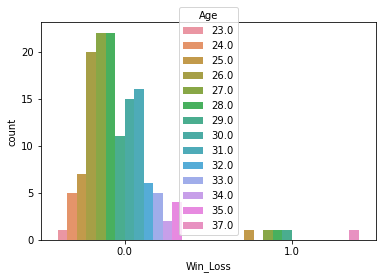

In [555]:
sns.countplot(x='Win_Loss',hue='Age',data=df)

## we can say that age isn't really important to win

<AxesSubplot:xlabel='Hair Color', ylabel='count'>

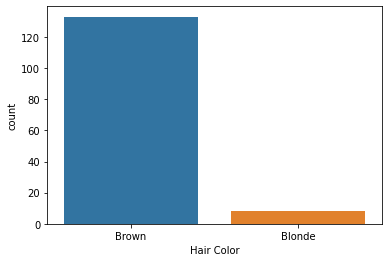

In [556]:
sns.countplot(x='Hair Color',data=df)

<AxesSubplot:xlabel='Win_Loss', ylabel='count'>

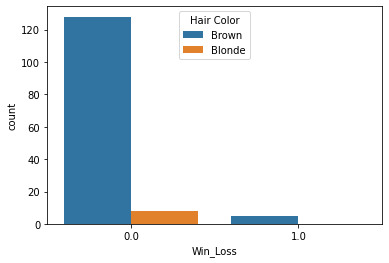

In [557]:
sns.countplot(x='Win_Loss',hue='Hair Color',data=df)

## We can say that women preferred men with brown hair.

<AxesSubplot:xlabel='Eye Color', ylabel='count'>

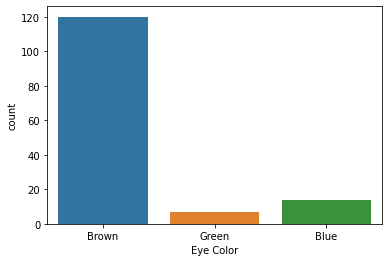

In [558]:
sns.countplot(x='Eye Color',data=df)

<AxesSubplot:xlabel='Win_Loss', ylabel='count'>

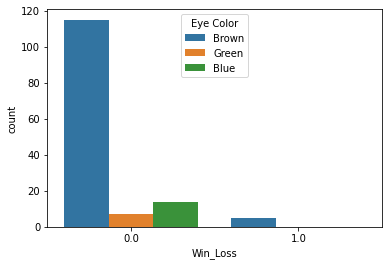

In [559]:
sns.countplot(x='Win_Loss',hue='Eye Color',data=df)

## We can say that women preferred men with brown eyes.

<AxesSubplot:xlabel='count', ylabel='Win_Loss'>

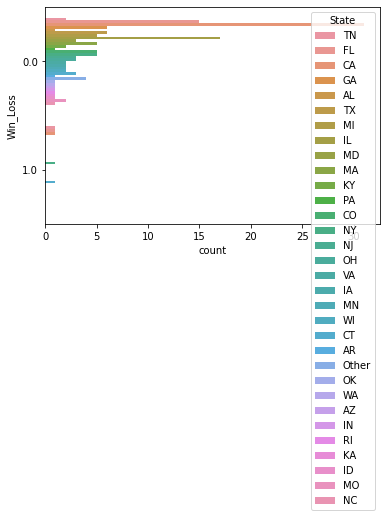

In [560]:
sns.countplot(y='Win_Loss',hue='State',data=df)

##  We can say that  winning didn't depend on the State

<AxesSubplot:xlabel='count', ylabel='Win_Loss'>

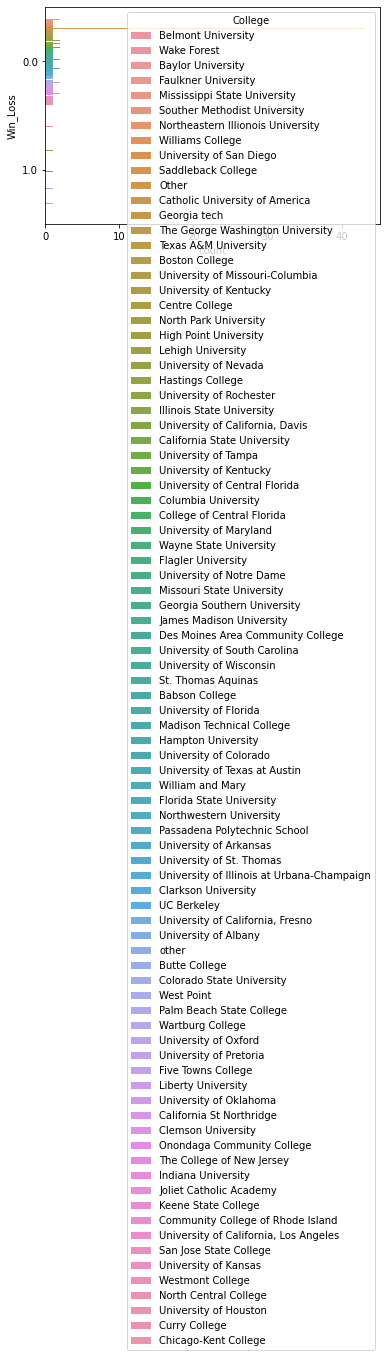

In [561]:
sns.countplot(y='Win_Loss',hue='College',data=df)

## We can say that winning didn't really depend on the college.

<AxesSubplot:xlabel='Win_Loss', ylabel='Occupation'>

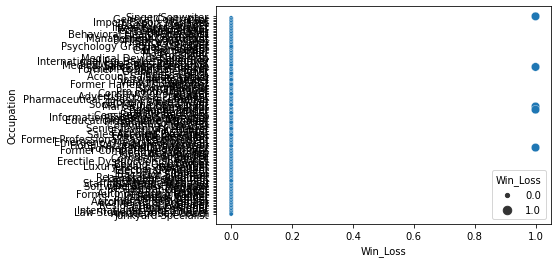

In [562]:
sns.scatterplot(x='Win_Loss',y='Occupation',size='Win_Loss',data=df)

## Winning doesn't really depend on the occupation either

<AxesSubplot:xlabel='Height (cm)', ylabel='count'>

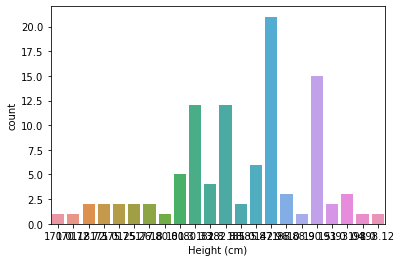

In [563]:
sns.countplot(x= 'Height (cm)',data=df)

<AxesSubplot:xlabel='count', ylabel='Win_Loss'>

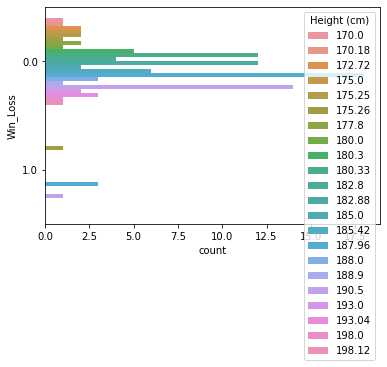

In [564]:
sns.countplot(y='Win_Loss',hue='Height (cm)',data=df)

## Women usually prefer men above the height of 175cm which is pretty tall for a man.

<AxesSubplot:xlabel='Win_Loss', ylabel='count'>

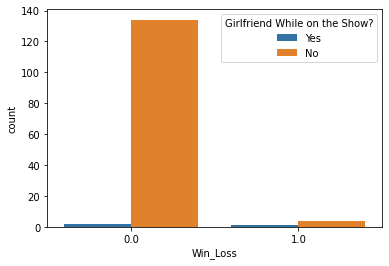

In [565]:
sns.countplot(x='Win_Loss',hue='Girlfriend While on the Show?',data=df)

In [566]:
df['Girlfriend While on the Show?'].value_counts()

No     138
Yes      3
Name: Girlfriend While on the Show?, dtype: int64

## It didn't really matter if they had a girlfriend on the show

#  Data Cleaning

<AxesSubplot:>

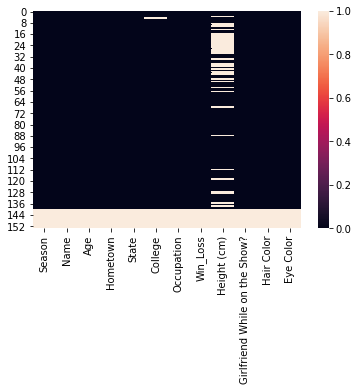

In [593]:
sns.heatmap(df.isnull())

## All the columns have null values and need to be cleaned.


In [594]:
df = df[~df['Name'].isnull()]  

## Dropping all the rows with no name.

In [595]:
df['Height (cm)'].round(decimals=0)

0      190.0
1      188.0
2      175.0
3      175.0
4        NaN
       ...  
136      NaN
137    188.0
138      NaN
139    188.0
140    190.0
Name: Height (cm), Length: 141, dtype: float64

In [596]:
for col in ['Height (cm)']:
    df[col].fillna(df[col].mean(), inplace = True)

## Filled att the missing heights with the mean of all heights. 

In [597]:
df.isnull().sum()

Season                           0
Name                             0
Age                              0
Hometown                         0
State                            0
College                          1
Occupation                       0
Win_Loss                         0
Height (cm)                      0
Girlfriend While on the Show?    0
Hair Color                       0
Eye Color                        0
dtype: int64

In [598]:
df.loc[df['College'].isnull(),'College'] = df['College'].value_counts().index[0] 

## Filling the missing college with the most common College

In [599]:
df.isnull().sum()

Season                           0
Name                             0
Age                              0
Hometown                         0
State                            0
College                          0
Occupation                       0
Win_Loss                         0
Height (cm)                      0
Girlfriend While on the Show?    0
Hair Color                       0
Eye Color                        0
dtype: int64

## We have got no null values now. 

In [600]:
print(df['Hometown'].nunique())
print(df['Occupation'].nunique())
print(df['College'].nunique())
print(df['State'].nunique())

115
126
88
32


In [601]:
df.drop(['Hometown','Occupation','College'],axis=1,inplace=True)

In [602]:
df.head()

,Season,Name,Age,State,Win_Loss,Height (cm),Girlfriend While on the Show?,Hair Color,Eye Color
0,15.0,Jed Wyatt,25.0,TN,1.0,190.500000,Yes,Brown,Brown
1,15.0,Tyler Cameron,26.0,FL,0.0,187.960000,No,Brown,Green
2,15.0,Peter Weber,27.0,CA,0.0,175.250000,No,Brown,Brown
3,15.0,Luke Parker,24.0,GA,0.0,175.000000,No,Blonde,Brown
4,15.0,Garrett Powell,27.0,AL,0.0,184.799802,No,Brown,Green


In [604]:
df.drop(['Name','State'],axis=1,inplace = True)

## We dropped columns that have almost no common values. 

In [605]:
df.head()

,Season,Age,Win_Loss,Height (cm),Girlfriend While on the Show?,Hair Color,Eye Color
0,15.0,25.0,1.0,190.500000,Yes,Brown,Brown
1,15.0,26.0,0.0,187.960000,No,Brown,Green
2,15.0,27.0,0.0,175.250000,No,Brown,Brown
3,15.0,24.0,0.0,175.000000,No,Blonde,Brown
4,15.0,27.0,0.0,184.799802,No,Brown,Green


In [606]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 140
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Season                         141 non-null    float64
 1   Age                            141 non-null    float64
 2   Win_Loss                       141 non-null    float64
 3   Height (cm)                    141 non-null    float64
 4   Girlfriend While on the Show?  141 non-null    object 
 5   Hair Color                     141 non-null    object 
 6   Eye Color                      141 non-null    object 
dtypes: float64(4), object(3)
memory usage: 8.8+ KB


<AxesSubplot:>

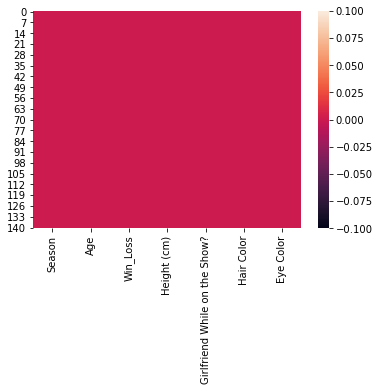

In [607]:
sns.heatmap(df.isnull())

## The data is now cleaned and we can move on to building our model. 

# Converting categorial values

## Now, we convert the categorical values to variables, so we can use them as inputs.

In [609]:
pd.get_dummies(df['Hair Color'],drop_first=True).head()

,Brown
0,1
1,1
2,1
3,0
4,1


In [610]:
pd.get_dummies(df['Girlfriend While on the Show?'],drop_first=True).head()

,Yes
0,1
1,0
2,0
3,0
4,0


In [611]:
pd.get_dummies(df['Eye Color'],drop_first=True).head()

,Brown,Green
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


In [612]:
Girlfriend = pd.get_dummies(df['Girlfriend While on the Show?'],drop_first=True)
Eye_Color = pd.get_dummies(df['Eye Color'],drop_first=True)
Hair_Color= pd.get_dummies(df['Hair Color'],drop_first=True)

In [613]:
df.drop(['Girlfriend While on the Show?','Hair Color','Eye Color'],axis=1,inplace=True)

In [614]:
df.head()

,Season,Age,Win_Loss,Height (cm)
0,15.0,25.0,1.0,190.500000
1,15.0,26.0,0.0,187.960000
2,15.0,27.0,0.0,175.250000
3,15.0,24.0,0.0,175.000000
4,15.0,27.0,0.0,184.799802


In [615]:
df = pd.concat([df, Girlfriend,Hair_Color,Eye_Color],axis=1)

In [616]:
df.head()

,Season,Age,Win_Loss,Height (cm),Yes,Brown,Brown,Green
0,15.0,25.0,1.0,190.500000,1,1,1,0
1,15.0,26.0,0.0,187.960000,0,1,0,1
2,15.0,27.0,0.0,175.250000,0,1,1,0
3,15.0,24.0,0.0,175.000000,0,0,1,0
4,15.0,27.0,0.0,184.799802,0,1,0,1


# Model Building

## Train Test Split

In [617]:
df.drop('Win_Loss',axis=1).head()

,Season,Age,Height (cm),Yes,Brown,Brown,Green
0,15.0,25.0,190.500000,1,1,1,0
1,15.0,26.0,187.960000,0,1,0,1
2,15.0,27.0,175.250000,0,1,1,0
3,15.0,24.0,175.000000,0,0,1,0
4,15.0,27.0,184.799802,0,1,0,1


In [618]:
df['Win_Loss'].head()

0    1.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Win_Loss, dtype: float64

In [619]:
X_train = df.drop("Win_Loss", axis=1)
Y_train = df["Win_Loss"]

In [620]:
from sklearn.model_selection import train_test_split

In [621]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Win_Loss',axis=1), 
                                                    df['Win_Loss'], test_size=0.30, 
                                                    random_state=101)

# Training and Predicting

## Building a Logistic Regression Model

In [622]:
from sklearn.linear_model import LogisticRegression

In [623]:
logmodel = LogisticRegression(max_iter = 2000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [624]:
predictions = logmodel.predict(X_test)

In [625]:
from sklearn.metrics import confusion_matrix

In [626]:
accuracy=confusion_matrix(y_test,predictions)

In [627]:
accuracy

array([[41,  0],
       [ 2,  0]], dtype=int64)

In [628]:
from sklearn.metrics import accuracy_score

In [629]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.9534883720930233

In [630]:
predictions

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Final Evaluation 

## We check the classification report

In [631]:
from sklearn.metrics import classification_report

In [632]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        41
         1.0       0.00      0.00      0.00         2

    accuracy                           0.95        43
   macro avg       0.48      0.50      0.49        43
weighted avg       0.91      0.95      0.93        43



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

